# 투자 백테스팅 시스템

## 1. 데이터 매트릭스 생성

In [2]:
!pip install -U finance-datareader

In [3]:
import pandas as pd
import pandas_datareader as wb
import numpy as np
import FinanceDataReader as fdr
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from statsmodels.tsa.stattools import adfuller
import joblib
from xgboost import XGBClassifier
from matplotlib import pyplot #as plt
from sklearn.metrics import mean_squared_error ,confusion_matrix
import datetime
from matplotlib import pyplot as plt



#!pip install lightgbm
#!pip install joblib
#!pip install xgboost

#이 부분은 https://blog.naver.com/PostView.naver?blogId=whdals0&logNo=222137060372 이거 참고

#!pip install pyplot


# 백테스팅 기간은 2001년부터 하였습니다.

In [4]:
start="2001"
end="2022-07-02"
stock_list=['^KS11'] #

for index,stock in enumerate(stock_list):
    
    stock_data=fdr.DataReader('KS11', start, end)
    close=stock_data.loc[:,'Close']
    if index==0:
        close_data1=pd.DataFrame(close)
    else:
        close_data1=pd.concat([close_data,pd.DataFrame(close)],axis=1)
    

C:\Users\User\anaconda3\lib\site-packages\FinanceDataReader\data.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(more)


In [5]:

stock_k=['JP225','CSI300','STOXX50','DJI','KS11','USD/KRW','VIX']
for index,i in enumerate(stock_k):
    stock_data=fdr.DataReader(i, start, end)
    close=stock_data.loc[:,'Close']
    if index==0:
        close_data=pd.DataFrame(close)
    else:
        close_data=pd.concat([close_data,pd.DataFrame(close)],axis=1)

        

close_data=close_data.ffill()

C:\Users\User\anaconda3\lib\site-packages\FinanceDataReader\data.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(more)
C:\Users\User\anaconda3\lib\site-packages\FinanceDataReader\data.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(more)
C:\Users\User\anaconda3\lib\site-packages\FinanceDataReader\data.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(more)
C:\Users\User\anaconda3\lib\site-packages\FinanceDataReader\data.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(more)
C:\Users\User\anaconda3\lib\site-packages\FinanceDataReader\data.py:47: FutureWarning: T

In [6]:
close_data

,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,
2001-01-02,NaN,NaN,NaN,10646.15,520.95,1278.00,29.99
2001-01-03,NaN,NaN,NaN,10945.75,521.43,1270.50,26.60
2001-01-04,NaN,NaN,NaN,10912.41,558.02,1263.30,26.97
2001-01-05,NaN,NaN,NaN,10662.01,580.85,1262.50,28.67
2001-01-08,NaN,NaN,NaN,10621.35,586.65,1263.30,29.84
...,...,...,...,...,...,...,...
2022-06-27,26871.27,4444.26,3538.88,31439.58,2401.92,1286.31,26.95
2022-06-28,27049.47,4490.52,3549.29,30947.78,2422.09,1292.06,28.36
2022-06-29,26804.60,4421.36,3514.32,31027.92,2377.99,1301.90,28.16


### API 데이터가 예전 데이터까지 제공을 해주지 않으므로 블룸버그를 통해서 데이터를 받아온 다음, CSV 파일로 저장하여 추가해주는 과정

In [7]:
data1=pd.read_csv('data1.csv')
data2=pd.read_csv('data2.csv')
csv_data=pd.concat([data1,data2],axis=0)#.ffill()#.dropna()
csv_data["DATE"]#.astype('str')
csv_data["DATE"]=pd.to_datetime(csv_data["DATE"])
csv_data=csv_data.set_index("DATE")
csv_data=pd.concat([csv_data,close_data1],axis=1)#.ffill()#.dropna()
csv_data=csv_data.reindex( columns = ['NKY Index','SHSZ300 Index','SX5E Index','INDU Index','Close','KRW Curncy','VIX Index','LMCADY Comdty','USYC2Y10 Index'])

In [8]:
csv_data=csv_data.drop(['LMCADY Comdty','USYC2Y10 Index'],axis=1)

In [9]:
new_data=close_data.ffill().loc[csv_data.dropna().index[-1]:,:].iloc[1:,:]
new_data.columns=['NKY Index','SHSZ300 Index','SX5E Index','INDU Index','Close','KRW Curncy','VIX Index']

In [10]:
csv_data=pd.concat([csv_data.loc[:csv_data.dropna().index[-1],:],new_data],axis=0)
csv_data.columns=['NKY Index','SHSZ300 Index','SX5E Index','INDU Index','KS','KRW Curncy','VIX Index']
csv_data=csv_data.reindex( columns = ['NKY Index','SHSZ300 Index','SX5E Index','INDU Index','KS','KRW Curncy','VIX Index'])

In [11]:
csv_data

,NKY Index,SHSZ300 Index,SX5E Index,INDU Index,KS,KRW Curncy,VIX Index
1982-05-17,7619.39,NaN,NaN,845.32,NaN,724.55,NaN
1982-05-18,7567.06,NaN,NaN,840.85,NaN,724.55,NaN
1982-05-19,7572.15,NaN,NaN,835.90,NaN,725.35,NaN
1982-05-20,7531.54,NaN,NaN,832.48,NaN,725.35,NaN
1982-05-21,7497.05,NaN,NaN,835.90,NaN,725.35,NaN
...,...,...,...,...,...,...,...
2022-06-27,26871.27,4444.26,3538.88,31439.58,2401.92,1286.31,26.95
2022-06-28,27049.47,4490.52,3549.29,30947.78,2422.09,1292.06,28.36
2022-06-29,26804.60,4421.36,3514.32,31027.92,2377.99,1301.90,28.16
2022-06-30,26393.04,4485.01,3454.86,30779.71,2332.64,1287.51,28.71


In [12]:
factors = ['VIXCLS','WLEMUINDXD','USEPUINDXD','BAMLH0A1HYBB','DCOILBRENTEU','DEXUSEU','BAMLHE00EHYIEY','BAMLEMRLCRPILATRIV','WEI']

df_factors = fdr.DataReader(factors, start='2001', data_source='fred')
df_factors.dropna(inplace=True)
df_factors=df_factors.asfreq(freq='d').ffill()

In [13]:
df_factors

,DCOILBRENTEU,DEXUSEU,BAMLEMRLCRPILATRIV,WLEMUINDXD,USEPUINDXD,VIXCLS,BAMLH0A1HYBB,BAMLHE00EHYIEY,WEI
DATE,,,,,,,,,
2008-01-05,96.87,1.4786,205.28,143.82,281.75,23.94,4.93,9.09,1.60
2008-01-06,96.87,1.4786,205.28,68.94,134.58,23.94,4.93,9.09,1.60
2008-01-07,94.19,1.4684,205.40,64.25,81.57,23.79,5.00,9.14,1.60
2008-01-08,96.37,1.4717,205.44,17.00,142.48,25.43,5.03,9.23,1.60
2008-01-09,96.76,1.4663,205.43,74.77,123.42,24.12,5.17,9.55,1.60
...,...,...,...,...,...,...,...,...,...
2022-07-01,119.69,1.0409,405.15,185.72,184.72,26.70,4.19,7.30,2.62
2022-07-02,119.69,1.0409,405.15,36.48,132.01,26.70,4.19,7.30,2.62
2022-07-03,119.69,1.0409,405.15,52.92,127.90,26.70,4.19,7.30,2.62


In [14]:
df_factors2= fdr.DataReader('HG').Close
df_factors2.dropna(inplace=True)
df_factors2.columns='HG'#.asfreq(freq='d').ffill()

C:\Users\User\anaconda3\lib\site-packages\FinanceDataReader\data.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(more)


In [15]:
csv_data=csv_data.dropna()
csv_data1=pd.concat([csv_data,df_factors2],axis=1)#.dropna()
csv_data1=csv_data1.loc[csv_data.index[0]:,:]
csv_data1.iloc[:-1]

,NKY Index,SHSZ300 Index,SX5E Index,INDU Index,KS,KRW Curncy,VIX Index,Close
2002-01-04,10871.49,1316.46,3820.42,10259.74,747.72,1302.50,20.45,0.6700
2002-01-07,10942.36,1302.08,3754.42,10197.05,751.48,1301.50,21.94,0.7100
2002-01-08,10695.60,1292.71,3724.04,10150.55,734.76,1308.50,21.83,0.7040
2002-01-09,10663.98,1272.65,3722.98,10094.09,751.61,1309.50,22.13,0.7110
2002-01-10,10538.43,1281.26,3666.36,10067.86,728.23,1312.00,22.36,0.7010
...,...,...,...,...,...,...,...,...
2022-06-28,27049.47,4490.52,3549.29,30947.78,2422.09,1292.06,28.36,3.7740
2022-06-29,26804.60,4421.36,3514.32,31027.92,2377.99,1301.90,28.16,3.7790
2022-06-30,26393.04,4485.01,3454.86,30779.71,2332.64,1287.51,28.71,3.7145
2022-07-01,25935.62,4466.72,3448.31,31097.46,2305.42,1298.67,26.70,3.6190


In [16]:
csv_data1

,NKY Index,SHSZ300 Index,SX5E Index,INDU Index,KS,KRW Curncy,VIX Index,Close
2002-01-04,10871.49,1316.46,3820.42,10259.74,747.72,1302.50,20.45,0.6700
2002-01-07,10942.36,1302.08,3754.42,10197.05,751.48,1301.50,21.94,0.7100
2002-01-08,10695.60,1292.71,3724.04,10150.55,734.76,1308.50,21.83,0.7040
2002-01-09,10663.98,1272.65,3722.98,10094.09,751.61,1309.50,22.13,0.7110
2002-01-10,10538.43,1281.26,3666.36,10067.86,728.23,1312.00,22.36,0.7010
...,...,...,...,...,...,...,...,...
2022-06-29,26804.60,4421.36,3514.32,31027.92,2377.99,1301.90,28.16,3.7790
2022-06-30,26393.04,4485.01,3454.86,30779.71,2332.64,1287.51,28.71,3.7145
2022-07-01,25935.62,4466.72,3448.31,31097.46,2305.42,1298.67,26.70,3.6190
2022-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.4250


In [17]:
def make_dataset(data,df_factors):
    day=5
    word='W-FRI'
    x_data=((data.iloc[:,:].asfreq(freq='d').pct_change()+1).rolling(day).apply(np.prod, raw=True)-1).asfreq(freq=word).dropna(how='all')
    date=str(x_data.index[0])[:10]
    df_factors1=((df_factors.iloc[:,:].asfreq(freq='d').pct_change()+1).loc[date:,:].rolling(day).apply(np.prod, raw=True)-1).asfreq(freq=word)
    df_factors1.columns=[i+'_chg' for i in df_factors1.columns]
    df_factors1.append(df_factors1.iloc[-1,:])
    x_data=pd.concat([x_data,df_factors1],axis=1).fillna(0)#.dropna().ffill()
    
    last_data=pd.concat([x_data,df_factors1],axis=1).asfreq(freq=word)#.dropna()
    last_data1=last_data.ffill().iloc[-2:,:]
    x_data=x_data.iloc[day:,:]
    print(x_data)
    #y_data=((data.iloc[:,:5].asfreq(freq='d').pct_change()+1 ).rolling(day).apply(np.prod, raw=True)-1).mean(axis=1).asfreq(freq=word).fillna(1)
    y_data=((x_data.iloc[:,:5]) ).mean(axis=1)#.asfreq(freq=word).fillna(1)
    
    y_data=y_data.iloc[:]
    s=y_data.index
    print(x_data.iloc[:,:],y_data.iloc[:-1])
    return x_data.iloc[:-1,:],y_data.iloc[1:],x_data.iloc[:,:]
    

In [18]:
#인풋값,아웃풋값 산출
x_data,y_data,last_data=make_dataset(csv_data1,df_factors)

x_index=x_data.index

x_data=x_data.replace((np.inf, -np.inf, np.nan), 1).reset_index(drop=True)
x_data.index=x_index

print(x_data,y_data)

            NKY Index  SHSZ300 Index  SX5E Index  INDU Index        KS  \
2002-02-15   0.000000       0.000000    0.000000    0.000000  0.000000   
2002-02-22   0.000000       0.000000    0.000000    0.000000  0.000000   
2002-03-01   0.093100       0.007700    0.033437    0.037139  0.108604   
2002-03-08   0.122590       0.086172    0.045559    0.046146  0.006439   
2002-03-15  -0.020005      -0.009727   -0.009006    0.003286  0.042519   
...               ...            ...         ...         ...       ...   
2022-06-03   0.036588       0.022060   -0.006616   -0.009473  0.012358   
2022-06-10   0.002259       0.036537   -0.048752   -0.045793 -0.028001   
2022-06-17  -0.066894       0.016525   -0.044660   -0.048014 -0.059687   
2022-06-24   0.020374       0.019895    0.027544    0.054162 -0.030452   
2022-07-01  -0.021001       0.016372   -0.024018   -0.012895 -0.025851   

            KRW Curncy  VIX Index     Close  DCOILBRENTEU_chg  DEXUSEU_chg  \
2002-02-15    0.000000   0.000000

C:\Users\User\AppData\Local\Temp\ipykernel_9900\1406976870.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_factors1.append(df_factors1.iloc[-1,:])


In [19]:
#pd.concat([x_data,y_data],ignore_index=True)

In [20]:
# 나중에 최종적으로 넣어줄데이터 -> 다음주 투자 방향 구할 수 있음.
last_data

,NKY Index,SHSZ300 Index,SX5E Index,INDU Index,KS,KRW Curncy,VIX Index,Close,DCOILBRENTEU_chg,DEXUSEU_chg,BAMLEMRLCRPILATRIV_chg,WLEMUINDXD_chg,USEPUINDXD_chg,VIXCLS_chg,BAMLH0A1HYBB_chg,BAMLHE00EHYIEY_chg,WEI_chg
2002-02-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2002-02-22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.046385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2002-03-01,0.093100,0.007700,0.033437,0.037139,0.108604,-0.001893,-0.071797,0.040057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2002-03-08,0.122590,0.086172,0.045559,0.046146,0.006439,-0.002807,-0.107457,0.027510,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2002-03-15,-0.020005,-0.009727,-0.009006,0.003286,0.042519,0.003652,-0.044110,-0.001339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03,0.036588,0.022060,-0.006616,-0.009473,0.012358,-0.001126,-0.036159,0.038430,0.037049,0.001121,-0.004952,-0.505433,1.191343,-0.036159,0.010949,0.007299,0.0
2022-06-10,0.002259,0.036537,-0.048752,-0.045793,-0.028001,0.022981,0.119403,-0.039691,0.014004,-0.018655,-0.009694,0.531551,-0.414170,0.119403,0.111913,0.076087,0.0
2022-06-17,-0.066894,0.016525,-0.044660,-0.048014,-0.059687,0.009333,0.121802,-0.065433,-0.064501,-0.004562,-0.027937,-0.259344,-0.191949,0.121802,0.175325,0.138047,0.0
2022-06-24,0.020374,0.019895,0.027544,0.054162,-0.030452,-0.001835,-0.125281,-0.068020,-0.015601,0.006302,-0.002205,-0.449343,-0.334547,-0.125281,-0.013812,0.013314,0.0


### 다음은 MinMax로 정규화를 해준 뒤, PCA를 이용하여 차원을 축소해주고 각 변수마다 정규성을 검정하는 과정입니다.

In [21]:

scaler =  MinMaxScaler()
scaler.fit(x_data)

MinMaxScaler()

In [22]:
#데이터 개수가 x,y가 서로 맞는지 확인
len(x_data),len(y_data)

(1063, 1063)

In [23]:
# PCA로 차원 축소
x_data_pca=x_data
#pca = PCA(n_components=7) # 주성분을 몇개로 할지 결정
#x_data_pca = pd.DataFrame(pca.fit_transform(x_data.fillna(0)))


In [24]:
#각 변수 정규성 검정
for i in range(len(x_data_pca.columns)):
    adfuller_test = adfuller(x_data_pca.iloc[:,i], autolag= "AIC")
    print("ADF test statistic: {}".format(adfuller_test[0]))
    print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -33.86391002489334
p-value: 0.0
ADF test statistic: -4.821665255227184
p-value: 4.942676134412615e-05
ADF test statistic: -9.50643116818558
p-value: 3.337703947577017e-16
ADF test statistic: -18.224267636144624
p-value: 2.3757242627567833e-30
ADF test statistic: -34.91282187492272
p-value: 0.0
ADF test statistic: -8.3844716958589
p-value: 2.45957387773344e-13
ADF test statistic: -12.170268890205135
p-value: 1.4260996452878165e-22
ADF test statistic: -6.405677073557931
p-value: 1.9460226055446098e-08
ADF test statistic: -16.097046155000022
p-value: 5.179511167212238e-29
ADF test statistic: -31.833760064314728
p-value: 0.0
ADF test statistic: -10.507171754807596
p-value: 1.0469715523074254e-18
ADF test statistic: -33.374965967734106
p-value: 0.0
ADF test statistic: -21.34976287075487
p-value: 0.0
ADF test statistic: -11.988946781025522
p-value: 3.5583087673439453e-22
ADF test statistic: -10.064027833895857
p-value: 1.310613469555225e-17
ADF test statistic: -15.6992706

C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


# 데이터를 split 하는 과정에서 시점마다 데이터의 분포가 다름을 생각하여, 학습이 잘 되게끔 데이터분포를 인위적으로 맞춰주는 과정을 추가해주었습니다.


In [25]:
def split_dataset(x_data,y_data,point,start_point=0):
 
    point1=int(point*len(x_data))
    end_point=point1+int(start_point*len(x_data))
    start_point=int(start_point*len(x_data))
    
    x_train=x_data.iloc[start_point:point1,:]
    
    y_train=y_data.iloc[start_point:point1]
    
    
    line1=0.00001
    line2= -0.00001
    switch=0
    loop_num=0
    while switch==0:
        loop_num+=1
        if loop_num>=20000:
            print('횟수초과')
            break
        
        loop=0
        y_list=[]
        for y_data12 in y_data:

            if y_data12 >=line1:
                y_list.append(2)

            elif y_data12 >=line2:
                y_list.append(1)

            else:
                y_list.append(0)

            
    

        y_data1=pd.DataFrame(y_list)
        y_data1.index=y_data.index
        

        y_train=y_data1.iloc[start_point:point1]
        y_frame=pd.DataFrame(y_train.value_counts())
        all_v=y_frame.sum()
        k=y_frame/all_v
        #print(int(k.index[0][0]))
        for index,i in enumerate(k.values):
            if (i>0.34) and (int(k.index[index][0])==2): 
                line1=line1+0.00001

                loop=1
                break
            
            if (i>0.33) and (int(k.index[index][0])==0):
                line2=line2-0.00001
                loop=1
                break


        if loop==1:
            #print(k)
            continue
        else:
            switch=1
            print(k)
    
    y_data=y_data1
    
    
    
    
    
    y_train=y_data.iloc[start_point:point1]
    
    print(y_train.value_counts())
    
    
    x_val=x_data.iloc[point1:point1+50,:]
    y_val=y_data.iloc[point1:point1+50]
    
    
    x_test=x_data.iloc[point1+50:,:]
    y_test=y_data.iloc[point1+50:]
    return x_train,y_train,x_val,y_val,x_test,y_test

In [26]:
x_train,y_train,x_val,y_val,x_test,y_test= split_dataset(x_data,y_data,0.72)

          0
0          
2  0.339869
1  0.332026
0  0.328105
2    260
1    254
0    251
dtype: int64


In [27]:
len(x_val),len(y_val)

(50, 50)

In [28]:
percent=0.8
point_list=np.arange(0.5, percent, 0.1)
point_list=[percent]
for index,point in enumerate(point_list):
    start_point=0
    x_train,y_train,x_val,y_val,x_test,y_test= split_dataset(x_data_pca,y_data,point,start_point)
    eval_set = [(x_train, y_train), (x_val, y_val)]
    model_cla=XGBClassifier(n_estimators=500,learning_rate=0.001,max_depth=3,objective='multi:softmax')
    model_cla.fit(x_train,y_train,early_stopping_rounds=5000, eval_metric='mlogloss',eval_set=eval_set, verbose=False)
    
    joblib.dump(model_cla, 'lgb.pkl'+str(index))
    
    



          0
0          
2  0.340000
1  0.330588
0  0.329412
2    289
1    281
0    280
dtype: int64


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


## 다음은 train loss와 validation loss를 그래프로 확인하는 코드입니다.

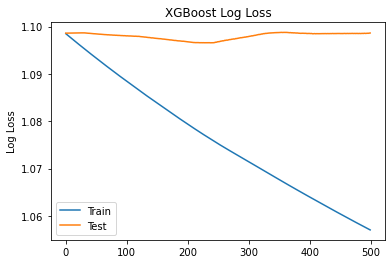

In [29]:

results = model_cla.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error


## 다음은 훈련시킨 모델을 이용하여 백테스팅하는 코드입니다.

In [30]:
x_train,y_train,x_val,y_val,x_test,y_test= split_dataset(x_data_pca,y_data,percent)

          0
0          
2  0.340000
1  0.330588
0  0.329412
2    289
1    281
0    280
dtype: int64


In [31]:
x_test,y_test

(            NKY Index  SHSZ300 Index  SX5E Index  INDU Index        KS  \
 2019-05-17  -0.004443      -0.021898    0.019217   -0.006876 -0.024781   
 2019-05-24  -0.006253      -0.015033   -0.021876   -0.006921 -0.005103   
 2019-05-31  -0.024436       0.009984   -0.020972   -0.030120 -0.001745   
 2019-06-07   0.008490      -0.009003    0.018144    0.029197  0.013405   
 2019-06-14   0.016403       0.016060    0.011749    0.021537  0.012711   
 ...               ...            ...         ...         ...       ...   
 2022-05-27   0.001595      -0.018712    0.041517    0.062474 -0.000470   
 2022-06-03   0.036588       0.022060   -0.006616   -0.009473  0.012358   
 2022-06-10   0.002259       0.036537   -0.048752   -0.045793 -0.028001   
 2022-06-17  -0.066894       0.016525   -0.044660   -0.048014 -0.059687   
 2022-06-24   0.020374       0.019895    0.027544    0.054162 -0.030452   
 
             KRW Curncy  VIX Index     Close  DCOILBRENTEU_chg  DEXUSEU_chg  \
 2019-05-17    0.01

In [32]:
pred_cla=model_cla.predict(x_test)
cf = confusion_matrix(y_test,pred_cla)
print(cf)
np.sum(np.diag(cf))/np.sum(cf)

[[15 22 19]
 [10 29  8]
 [22 16 22]]


0.4049079754601227

## 다음은 중요도를 산출하는 과정입니다.

In [82]:
imp=model_cla.feature_importances_

imp

array([0.06656035, 0.08435258, 0.08922459, 0.08258396, 0.06778609,
       0.0168843 , 0.06241997, 0.08445281, 0.0783318 , 0.07105435,
       0.06451138, 0.04665607, 0.02703952, 0.07405881, 0.04051125,
       0.04357211, 0.        ], dtype=float32)

In [83]:
pd.DataFrame(x_data_pca.columns,imp).reset_index().sort_values('index',ascending=False)

,index,0
2,0.089225,SX5E Index
7,0.084453,Close
1,0.084353,SHSZ300 Index
3,0.082584,INDU Index
8,0.078332,DCOILBRENTEU_chg
13,0.074059,VIXCLS_chg
9,0.071054,DEXUSEU_chg
4,0.067786,KS
0,0.066560,NKY Index
10,0.064511,BAMLEMRLCRPILATRIV_chg


## 다음은 실제 데이터를 이용해 백테스팅 과정입니다.

In [84]:
# 데이터 프레임 생성

predict=pd.DataFrame(np.array(pred_cla))
predict.index=y_test.index


In [85]:
# 빈날짜를 채워주는 과정
csv_data_p=csv_data1.asfreq('d').ffill()

2 : 상승 -> 비중 0.7
1 : 보합 -> 비중 0.5
0 : 하락 -> 비중 0.3

벤치마크 모델 : 글로번 자산 고르게 투자 비중 0.5로 투자 나머지 현금 보유

In [86]:
backtest_profit=[]
bench_profit_list=[]
day=7 #7일 간격으로 데이터 확인 
last_value=1

back_date_list=predict.index.tolist()
for value,date in zip(predict.values,predict.index):
    if back_date_list.index(date)==len(back_date_list)-1:
        break
    if value ==2:
        stock_weight=0.7
        last_value=value
    
    elif value ==0:
        stock_weight=0.3
        last_value=value
      
    elif value==1:
        
        if last_value==2:
            stock_weight=0.7
        elif last_value==0 :
            stock_weight=0.3
        else:
            stock_weight=0.5
            
    stock_profit=(csv_data_p.loc[date+datetime.timedelta(days=2):date+datetime.timedelta(days=day),:'KS'].pct_change().dropna()+1).mean(axis=1).cumprod().iloc[-1]
    
    profit=(stock_weight)*(stock_profit-1)#+bond_weight*(bond_profit-1)
    
    bench_profit=((stock_profit-1))/2 #+(bond_profit-1)
    backtest_profit.append(profit)
    bench_profit_list.append(bench_profit)

In [87]:
backtest_pd=(pd.DataFrame(backtest_profit)+1).cumprod()*1000
bench_pd=(pd.DataFrame(bench_profit_list)+1).cumprod()*1000


In [88]:
backtest_pd.index=pd.to_datetime(predict.index[1:])
bench_pd.index=pd.to_datetime(predict.index[1:])

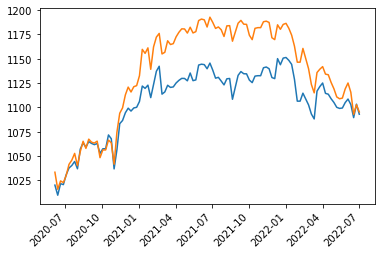

In [89]:

fig,ax = plt.subplots()
plt.plot(backtest_pd)
plt.plot(bench_pd)
fig.autofmt_xdate(rotation=45)


Text(0.5, 1.0, 'alpa')

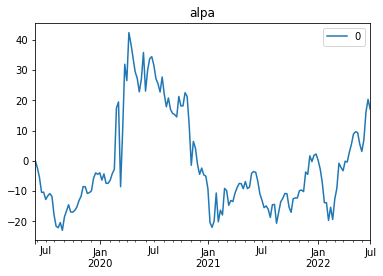

In [75]:
xz=backtest_pd-bench_pd
xz.plot()
plt.title('alpa')

In [76]:
print('최소', backtest_pd.min().values[0])
print( '변동성' , xz.std().values[0])
print( '평균' , xz.mean().values[0])
print( '테스트-벤치 샤프지수 : ', (xz.mean().values/xz.std().values)[0])
print( '벤치마크 샤프지수 : ', (bench_pd.mean().values/bench_pd.std().values)[0])
print( '테스트 샤프지수 : ', (backtest_pd.mean().values/backtest_pd.std().values)[0])

최소 912.1064121094264
변동성 15.826760897911718
평균 -1.210666160126103
테스트-벤치 샤프지수 :  -0.07649487901759139
벤치마크 샤프지수 :  14.022838530219548
테스트 샤프지수 :  15.028766326451716


# 이상치 스코어를 이용한 백테스팅

In [42]:
country_data=pd.read_csv('all_country_0527.csv')
country_data['Date']= pd.to_datetime(country_data["Date"])
country_data=country_data.set_index('Date').rolling(5).mean().dropna().asfreq(freq='W-FRI')

country_data
scaler =  StandardScaler()
scaler.fit(country_data)
country_data=country_data.asfreq('d').ffill()

In [43]:
country_data

,NKY Index,SHSZ300 Index,SX5E Index,INDU Index,KS
Date,,,,,
2019-11-08,1.199781,0.886166,1.084724,0.875195,0.906312
2019-11-09,1.199781,0.886166,1.084724,0.875195,0.906312
2019-11-10,1.199781,0.886166,1.084724,0.875195,0.906312
2019-11-11,1.199781,0.886166,1.084724,0.875195,0.906312
2019-11-12,1.199781,0.886166,1.084724,0.875195,0.906312
...,...,...,...,...,...
2022-05-23,0.691557,0.678827,0.603740,0.606981,0.392731
2022-05-24,0.691557,0.678827,0.603740,0.606981,0.392731
2022-05-25,0.691557,0.678827,0.603740,0.606981,0.392731


In [44]:

backtest_profit=[]
bench_profit_list=[]
day=7
last_value=1

back_date_list=predict.index.tolist()
back_date_list2=[]
for value,date in zip(predict.values,predict.index):
    if back_date_list.index(date)==len(back_date_list)-1:
        break
    if value ==2:
        stock_weight=0.7
        last_value=value
    
    elif value ==0:
        stock_weight=0.3
        last_value=value
      
    elif value==1:
        
        if last_value==2:
            stock_weight=0.7
        elif last_value==0 :
            stock_weight=0.3
        else:
            stock_weight=0.5
    
    
    try:
        weight_list=[stock_weight*0.4,stock_weight*0.2,stock_weight*0.1,stock_weight*0.1,stock_weight*0.1]
        print(date)
        stock_profit=(csv_data_p.loc[date+datetime.timedelta(days=3):date+datetime.timedelta(days=day),:'KS'].pct_change().dropna()+1).mean(axis=1).cumprod().iloc[-1]
        total_profit=0
        for i,weight in zip(country_data.loc[str(date)[:10],:].sort_values(ascending=True).index,weight_list):
            #print(country_data.loc[str(date)[:10],:].sort_values(ascending=True).index)
            profit=(csv_data_p.pct_change().dropna().loc[date+datetime.timedelta(days=3):date+datetime.timedelta(days=day),i]+1).cumprod().iloc[-1]
            total_profit+=(profit-1)*weight
            

        profit=(total_profit)
        #print(profit)
        bench_profit=((stock_profit-1))/2 
        #print(bench_profit)
        backtest_profit.append(profit)
        bench_profit_list.append(bench_profit)
        back_date_list2.append(date+datetime.timedelta(days=day))
    
    except:
        print('에러')
        continue

2021-06-04 00:00:00
2021-06-11 00:00:00
2021-06-18 00:00:00
2021-06-25 00:00:00
2021-07-02 00:00:00
2021-07-09 00:00:00
2021-07-16 00:00:00
2021-07-23 00:00:00
2021-07-30 00:00:00
2021-08-06 00:00:00
2021-08-13 00:00:00
2021-08-20 00:00:00
2021-08-27 00:00:00
2021-09-03 00:00:00
2021-09-10 00:00:00
2021-09-17 00:00:00
2021-09-24 00:00:00
2021-10-01 00:00:00
2021-10-08 00:00:00
2021-10-15 00:00:00
2021-10-22 00:00:00
2021-10-29 00:00:00
2021-11-05 00:00:00
2021-11-12 00:00:00
2021-11-19 00:00:00
2021-11-26 00:00:00
2021-12-03 00:00:00
2021-12-10 00:00:00
2021-12-17 00:00:00
2021-12-24 00:00:00
2021-12-31 00:00:00
2022-01-07 00:00:00
2022-01-14 00:00:00
2022-01-21 00:00:00
2022-01-28 00:00:00
2022-02-04 00:00:00
2022-02-11 00:00:00
2022-02-18 00:00:00
2022-02-25 00:00:00
2022-03-04 00:00:00
2022-03-11 00:00:00
2022-03-18 00:00:00
2022-03-25 00:00:00
2022-04-01 00:00:00
2022-04-08 00:00:00
2022-04-15 00:00:00
2022-04-22 00:00:00
2022-04-29 00:00:00
2022-05-06 00:00:00
2022-05-13 00:00:00


In [45]:
backtest_pd=(pd.DataFrame(backtest_profit)+1).cumprod()*1000
bench_pd=(pd.DataFrame(bench_profit_list)+1).cumprod()*1000
#backtest_pd.index=pd.to_datetime(predict.index[1:])
#bench_pd.index=pd.to_datetime(predict.index[1:])

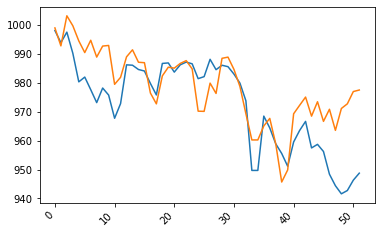

In [46]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots()
plt.plot(backtest_pd)
plt.plot(bench_pd)
#plt.xticks()
fig.autofmt_xdate(rotation=45)

<AxesSubplot:>

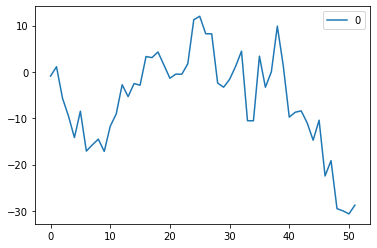

In [47]:
xz=backtest_pd-bench_pd
xz.plot()

In [48]:
xz.min()

0   -18.849406
dtype: float64

0   -18.849406
dtype: float64

In [49]:
print('최소', backtest_pd.min().values[0])
print( '변동성' , xz.std().values[0])
print( '평균' , xz.mean().values[0])
print( '테스트-벤치 샤프지수 : ', (xz.mean().values/xz.std().values)[0])
print( '테스트 샤프지수 : ', (backtest_pd.mean().values/backtest_pd.std().values)[0])

최소 953.7441577905169
변동성 8.570976744203458
평균 -2.1670871473999136
테스트-벤치 샤프지수 :  -0.2528401618713424
테스트 샤프지수 :  70.63027013433039
최소 953.7441577905169
변동성 8.570976744203458
평균 -2.1670871473999136
테스트-벤치 샤프지수 :  -0.2528401618713424
테스트 샤프지수 :  70.63027013433039


In [50]:
mat=['GC',"CL",'USD/KRW'] #'152380',

In [51]:
for index,asset in  enumerate(mat):
    as_factors2= fdr.DataReader(asset).Close
    as_factors2.dropna(inplace=True)
    as_factors2.columns=asset#.asfreq(freq='d').ffill()
    
    if index==0:
        asset_df=pd.DataFrame(as_factors2)
    else:
        asset_df=pd.concat([asset_df,pd.DataFrame(as_factors2)],axis=1)

C:\Users\User\anaconda3\lib\site-packages\FinanceDataReader\data.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(more)
C:\Users\User\anaconda3\lib\site-packages\FinanceDataReader\data.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(more)
C:\Users\User\anaconda3\lib\site-packages\FinanceDataReader\data.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(more)
C:\Users\User\anaconda3\lib\site-packages\FinanceDataReader\data.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(more)
C:\Users\User\anaconda3\lib\site-packages\FinanceDataReader\data.py:47: FutureWarning: T

In [52]:
asset_df=asset_df.dropna()
asset_df.columns=mat

In [53]:
backtest_profit=pd.DataFrame(backtest_profit)
backtest_profit.index=back_date_list2

In [54]:
asset_all=pd.concat([asset_df,csv_data.iloc[:,:5]],axis=1).ffill().dropna()
asset_all=asset_all.pct_change()
asset_all=asset_all.asfreq('D').fillna(0)
asset_all=asset_all.dropna()

In [55]:
asset_all

,GC,CL,USD/KRW,NKY Index,SHSZ300 Index,SX5E Index,INDU Index,KS
2005-12-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-12-08,0.064220,0.006557,-0.000966,-0.019458,0.000252,0.001438,-0.005161,-0.000415
2005-12-09,0.008621,-0.003981,0.000967,0.014535,0.015216,-0.002729,0.002181,-0.005120
2005-12-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-12-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2022-06-20,0.000000,0.000000,0.000000,-0.007387,0.004964,0.009123,0.000000,-0.020443
2022-06-21,0.000000,0.032685,0.000356,0.018435,-0.001122,0.006966,0.021639,0.007486
2022-06-22,-0.009009,0.018964,0.004537,-0.003687,-0.012704,-0.008403,-0.001634,-0.027448
2022-06-23,0.009091,0.012450,0.001719,0.000830,0.017154,-0.008183,0.006439,-0.012161


,GC,CL,USD/KRW,NKY Index,SHSZ300 Index,SX5E Index,INDU Index,KS
2005-12-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-12-08,0.064220,0.006557,-0.000966,-0.019458,0.000252,0.001438,-0.005161,-0.000415
2005-12-09,0.008621,-0.003981,0.000967,0.014535,0.015216,-0.002729,0.002181,-0.005120
2005-12-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-12-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2022-06-20,0.000000,0.000000,0.000000,-0.007387,0.004964,0.009123,0.000000,-0.020443
2022-06-21,0.000000,0.032685,0.000356,0.018435,-0.001122,0.006966,0.021639,0.007486
2022-06-22,-0.009009,0.018964,0.004537,-0.003687,-0.012704,-0.008403,-0.001634,-0.027448
2022-06-23,0.009091,0.012450,0.001719,0.000830,0.017154,-0.008183,0.006439,-0.012161


In [56]:
from scipy.optimize import minimize

# 목적함수를 선언한다
def obj_sharpe( weights, returns, covmat, rf ):
    ret = np.dot( weights, np.mean(returns)*250 )
    #print(ret)
    #print(np.mean(returns))
    #covmat[covmat > 0] = 0
    vol = np.sqrt( weights.T @ covmat @ weights )
    #print(np.shape(vol))
    return 1 /( ( ret-rf ) / np.sqrt( vol ) )



## 펀드 데이터를 불러옵니다.

In [57]:

fund_data=pd.read_csv('fund.csv')
fund_data=(fund_data.T.iloc[1:]/100+1)*1000
fund_data.index=pd.to_datetime(fund_data.index)

In [58]:
fund_data#.iloc[-200:].plot()

,0
2015-03-03,1000.0
2015-03-04,997.9
2015-03-05,993.3
2015-03-06,991.7
2015-03-07,991.7
...,...
2022-05-21,1209.8
2022-05-22,1209.7
2022-05-23,1208.6
2022-05-24,1221.3


,0
2015-03-03,1000.0
2015-03-04,997.9
2015-03-05,993.3
2015-03-06,991.7
2015-03-07,991.7
...,...
2022-05-21,1209.8
2022-05-22,1209.7
2022-05-23,1208.6
2022-05-24,1221.3


In [59]:
TOLERANCE = 1e-10


def _allocation_risk(weights, covariances):

    # We calculate the risk of the weights distribution
    portfolio_risk = np.sqrt((weights * covariances * weights.T))[0, 0]

    # It returns the risk of the weights distribution
    return portfolio_risk


def _assets_risk_contribution_to_allocation_risk(weights, covariances):

    # We calculate the risk of the weights distribution
    portfolio_risk = _allocation_risk(weights, covariances)

    # We calculate the contribution of each asset to the risk of the weights
    # distribution
    assets_risk_contribution = np.multiply(weights.T, covariances * weights.T) \
        / portfolio_risk

    # It returns the contribution of each asset to the risk of the weights
    # distribution
    return assets_risk_contribution


def _risk_budget_objective_error(weights, args):

    # The covariance matrix occupies the first position in the variable
    covariances = args[0]

    # The desired contribution of each asset to the portfolio risk occupies the
    # second position
    assets_risk_budget = args[1]

    # We convert the weights to a matrix
    weights = np.matrix(weights)

    # We calculate the risk of the weights distribution
    portfolio_risk = _allocation_risk(weights, covariances)

    # We calculate the contribution of each asset to the risk of the weights
    # distribution
    assets_risk_contribution = \
        _assets_risk_contribution_to_allocation_risk(weights, covariances)

    # We calculate the desired contribution of each asset to the risk of the
    # weights distribution
    assets_risk_target = \
        np.asmatrix(np.multiply(portfolio_risk, assets_risk_budget))

    # Error between the desired contribution and the calculated contribution of
    # each asset
    error = \
        sum(np.square(assets_risk_contribution - assets_risk_target.T))[0, 0]

    # It returns the calculated error
    return error


def _get_risk_parity_weights(covariances, assets_risk_budget, initial_weights):

    # Restrictions to consider in the optimisation: only long positions whose
    # sum equals 100%
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1.0},
                   {'type': 'ineq', 'fun': lambda x: x})

    # Optimisation process in scipy
    optimize_result = minimize(fun=_risk_budget_objective_error,
                               x0=initial_weights,
                               args=[covariances, assets_risk_budget],
                               method='SLSQP',
                               constraints=constraints,
                               tol=TOLERANCE,
                               options={'disp': False})

    # Recover the weights from the optimised object
    weights = optimize_result.x

    # It returns the optimised weights
    return weights


def get_weights(data):

    # We download the prices from Yahoo Finance
    prices = data
    # We calculate the covariance matrix
    covariances = 52.0 * \
        prices.asfreq('W-FRI').pct_change().iloc[1:, :].cov().values

    # The desired contribution of each asset to the portfolio risk: we want all
    # asset to contribute equally
    assets_risk_budget = [1 / prices.shape[1]] * prices.shape[1]

    # Initial weights: equally weighted
    init_weights = [1 / prices.shape[1]] * prices.shape[1]

    # Optimisation process of weights
    weights = \
        _get_risk_parity_weights(covariances, assets_risk_budget, init_weights)

    # Convert the weights to a pandas Series
    weights = pd.Series(weights, index=prices.columns, name='weight')

    # It returns the optimised weights
    return weights

In [60]:
get_weights(asset_all)


GC               6.968137e-01
CL               1.292895e-01
USD/KRW         -8.843709e-12
NKY Index        7.022415e-02
SHSZ300 Index    4.016113e-02
SX5E Index       6.298272e-03
INDU Index       4.438581e-02
KS               1.282744e-02
Name: weight, dtype: float64

GC               6.968137e-01
CL               1.292895e-01
USD/KRW         -8.843709e-12
NKY Index        7.022415e-02
SHSZ300 Index    4.016113e-02
SX5E Index       6.298272e-03
INDU Index       4.438581e-02
KS               1.282744e-02
Name: weight, dtype: float64

In [61]:
from scipy.optimize import minimize
def RC(weight, covmat) :
    weight = np.array(weight)
    variance = weight.T @ covmat @ weight
    sigma = variance ** 0.5
    mrc = 1/sigma * (covmat @ weight)
    rc = weight * mrc
    rc = rc / rc.sum()
    return(rc)


def RiskParity_objective(x) :
    
    variance = x.T @ covmat @ x
    sigma = variance ** 0.5
    mrc = 1/sigma * (covmat @ x)
    rc = x * mrc
    a = np.reshape(rc, (len(rc), 1))
    risk_diffs = a - a.T
    sum_risk_diffs_squared = np.sum(np.square(np.ravel(risk_diffs)))
    return (sum_risk_diffs_squared)

def weight_sum_constraint(x) :
    return(x.sum() - 1 )


def weight_longonly(x) :
    return(x)

def RiskParity(covmat) :
    
    x0 = np.repeat(1/covmat.shape[1], covmat.shape[1]) 
    constraints = ({'type': 'eq', 'fun': weight_sum_constraint},
                  {'type': 'ineq', 'fun': weight_longonly})
    options = {'ftol': 1e-20, 'maxiter': 800}
    
    result = minimize(fun = RiskParity_objective,
                      x0 = x0,
                      method = 'SLSQP',
                      constraints = constraints,
                      options = options)
    return(result.x)

In [62]:

backtest_profit=[]
bench_profit_list=[]
day=7
last_value=1

back_date_list=predict.index.tolist()
back_date_list2=[]
z=0
cash_ratio=0.1
for value,date in zip(predict.values,predict.index):
    z+=1
    #if z%2==0:
    #    continue
    if back_date_list.index(date)==len(back_date_list)-1:
        break
    if value ==2:
        stock_weight=0.2
        last_value=value
    
    elif value ==0:
        stock_weight=-0.2
        last_value=value
      
    elif value==1:
        
        if last_value==2:
            stock_weight=0.2
        elif last_value==0 :
            stock_weight=-0.2
        else:
            stock_weight=0
    
    
    
    n_assets = len( asset_all.columns )

    
    
    rf = 0.001

    # 초기 투자 비중은 종목 개수만큼 균등하게 정한다
    weights = np.ones( [n_assets] ) / n_assets

    # 투자 비중의 범위는 0~100%이고 이를 종목 개수만큼 튜플로 만든다
    bnds = tuple( ( 0.0,0.15) for i in range( n_assets ) )
    #print(bnds)
    # 앞서 최적화 함수 constraint1(), constraint2()를 정의해 제약식을 만든 방법과 같다
    # 제약식은 람다(lambda) 함수로 만든다
    cons = ( { 'type': 'eq', 'fun': lambda w: np.sum(w) - 1} )

    
    
    covmat=np.cov(asset_all.loc[str(date-datetime.timedelta(days=90))[:10]:str(date )[:10],:].T)#*250
    #print(cov_daily)
    ret_annual=asset_all.loc[:str(date )[:10],:]
    #print(ret_annual)
    wt_erc = RiskParity(covmat)
    #wt_erc
    #res = minimize( obj_variance, weights, (cov_daily), method='SLSQP', bounds=bnds, constraints=cons )
    #res = minimize( obj_sharpe, weights, ( ret_annual, covmat, rf ), method='SLSQP', bounds=bnds, constraints=cons )
    #x=res.x
    x=wt_erc
    #x=get_weights(asset_all.loc[str(date-datetime.timedelta(days=60))[:10]:str(date )[:10],:])
    k=pd.DataFrame(x).iloc[:]
    #k=k / k.iloc[:].sum()
    k.index=asset_all.iloc[:,:].columns
    other_num=len(mat)
    k_stock=pd.DataFrame(x).iloc[other_num:]
    stock_all_weight=k_stock.sum()
    k_stock=k_stock / stock_all_weight
    k_stock.index=asset_all.iloc[:,other_num:].columns
    
    k_mat=pd.DataFrame(x).iloc[:other_num]
    mat_all_weight=k_mat.sum()
    k_mat=k_mat / mat_all_weight
    k_mat.index=asset_all.iloc[:,:other_num].columns
    
    
    weight_list=[0.06,0.03,0.01,-0.03,-0.07]
    print(date)
    stock_profit=(fund_data.pct_change().dropna().loc[date+datetime.timedelta(days=3):date+datetime.timedelta(days=day)]+1).cumprod().iloc[-1]
        
    
    total_profit=0
    total_weight_list=[]
    mat_all_weight_list=[]
    try:
        print(country_data.loc[str(date)[:10],:].sort_values(ascending=True).index)
        for i,weight in zip(country_data.loc[str(date)[:10],:].sort_values(ascending=True).index,weight_list):

            profit=(csv_data_p.pct_change().dropna().loc[str(date+datetime.timedelta(days=3))[:10]:str(date+datetime.timedelta(days=day))[:10],i]+1).cumprod().iloc[-1]
            each_weight=float(weight+ (k_stock.loc[i]* (stock_all_weight+stock_weight)  ).values)
            #print(each_weight)
            if each_weight<0 and i!='KS':

                each_weight=0

            total_profit+=(profit-1)*(each_weight)

            total_weight_list.append(each_weight)

        for i in asset_all.iloc[:,:len(mat)].columns:

            mat_profit=(asset_all.loc[date+datetime.timedelta(days=3):date+datetime.timedelta(days=day),i]+1).cumprod().iloc[-1]
            mat_weight=k_mat.loc[i]

            each_mat_weight=float((mat_weight*(mat_all_weight)).values)
            if i=='USD/KRW':
                each_mat_weight=(1-sum(total_weight_list))
                if each_mat_weight <0:
                    each_mat_weight=0
            elif (each_mat_weight >0.1) and (i==152380):
                each_mat_weight = 0.1

            elif each_mat_weight >0.1:
                each_mat_weight=0.1

            if stock_weight >0:
                total_profit+= (mat_profit-1)*(each_mat_weight)
                print(each_mat_weight)
                mat_all_weight_list.append(each_mat_weight)
            else:
                total_profit+= (mat_profit-1)*(each_mat_weight)

            total_weight_list.append(each_mat_weight)
        print(total_weight_list,sum(total_weight_list))
        profit=(total_profit)
        #print(profit)
        bench_profit=((stock_profit-1))
        #print(bench_profit)
        backtest_profit.append(profit)
        bench_profit_list.append(bench_profit)
        back_date_list2.append(date+datetime.timedelta(days=day))
    except:
        print('에러')


2021-05-28 00:00:00
Index(['SHSZ300 Index', 'KS', 'NKY Index', 'INDU Index', 'SX5E Index'], dtype='object')
[0.11208748153175953, 0.09467676499307343, 0.05156344803410298, 0.050805418197637356, 0.0010612751765267103, 0.02783280284480592, 0.1, 0.5619728092220941] 1.0
2021-05-28 00:00:00
Index(['SHSZ300 Index', 'KS', 'NKY Index', 'INDU Index', 'SX5E Index'], dtype='object')
[0.11208748153175953, 0.09467676499307343, 0.05156344803410298, 0.050805418197637356, 0.0010612751765267103, 0.02783280284480592, 0.1, 0.5619728092220941] 1.0
2021-06-04 00:00:00
Index(['SHSZ300 Index', 'NKY Index', 'KS', 'INDU Index', 'SX5E Index'], dtype='object')
[0.11294366324346863, 0.07053227085847846, 0.0768003983918602, 0.059436822519857865, 0.00036945763664833486, 0.02550786705498745, 0.1, 0.554409520294699] 1.0
2021-06-04 00:00:00
Index(['SHSZ300 Index', 'NKY Index', 'KS', 'INDU Index', 'SX5E Index'], dtype='object')
[0.11294366324346863, 0.07053227085847846, 0.0768003983918602, 0.059436822519857865, 0.00036

2021-09-10 00:00:00
Index(['KS', 'SHSZ300 Index', 'NKY Index', 'INDU Index', 'SX5E Index'], dtype='object')
[0.1957028334159989, 0.11695946161785835, 0.09756691770479282, 0.12069287551652222, 0.03766524919810431, 0.07781746196691045, 0.1, 0.253595200579813] 1.0
2021-09-17 00:00:00
Index(['KS', 'SHSZ300 Index', 'INDU Index', 'NKY Index', 'SX5E Index'], dtype='object')
[0.18383539301493332, 0.11645842404010744, 0.17428661663650705, 0.053755766567938235, 0.03786560761820659, 0.07738498198378622, 0.1, 0.25641321013852125] 1.0
2021-09-17 00:00:00
Index(['KS', 'SHSZ300 Index', 'INDU Index', 'NKY Index', 'SX5E Index'], dtype='object')
[0.18383539301493332, 0.11645842404010744, 0.17428661663650705, 0.053755766567938235, 0.03786560761820659, 0.07738498198378622, 0.1, 0.25641321013852125] 1.0
2021-09-24 00:00:00
Index(['KS', 'SHSZ300 Index', 'INDU Index', 'NKY Index', 'SX5E Index'], dtype='object')
[0.1804080603130954, 0.11562462629435512, 0.17539781650239272, 0.06007457806130283, 0.034665605690

2021-12-24 00:00:00
Index(['KS', 'SHSZ300 Index', 'INDU Index', 'NKY Index', 'SX5E Index'], dtype='object')
[0.10063798701536197, 0.0864267937394246, 0.056211383278021235, 0, 0, 0.07510459416764427, 0.07336160108920614, 0.6082576407103417] 1.0
2021-12-31 00:00:00
Index(['KS', 'SHSZ300 Index', 'INDU Index', 'NKY Index', 'SX5E Index'], dtype='object')
[0.1011102951092634, 0.08450771477396862, 0.059707787128473536, 0.0004953198245658957, 0, 0.07573150626926699, 0.07487123245187512, 0.6035761444425864] 1.0
Index(['KS', 'SHSZ300 Index', 'INDU Index', 'NKY Index', 'SX5E Index'], dtype='object')
[0.1011102951092634, 0.08450771477396862, 0.059707787128473536, 0.0004953198245658957, 0, 0.07573150626926699, 0.07487123245187512, 0.6035761444425864] 1.0
2022-01-07 00:00:00
Index(['KS', 'NKY Index', 'SHSZ300 Index', 'INDU Index', 'SX5E Index'], dtype='object')
[0.10243278393983037, 0.058957790113421456, 0.06746932832421794, 0.020014072040235364, 0, 0.07091523872209148, 0.08050388156429433, 0.599706

2022-04-08 00:00:00
Index(['KS', 'NKY Index', 'SX5E Index', 'INDU Index', 'SHSZ300 Index'], dtype='object')
[0.15663131462213026, 0.109824418020372, 0.08567545025480922, 0.1008904779018922, 0.03703857033158804, 0.1, 0.1, 0.30993976886920827] 1.0
2022-04-15 00:00:00
Index(['KS', 'NKY Index', 'SX5E Index', 'INDU Index', 'SHSZ300 Index'], dtype='object')
[0.1576107891846288, 0.11038957605099926, 0.08618853928325214, 0.0988122830056658, 0.03675746698652402, 0.1, 0.1, 0.31024134548893] 1.0
2022-04-22 00:00:00
2022-04-15 00:00:00
Index(['KS', 'NKY Index', 'SX5E Index', 'INDU Index', 'SHSZ300 Index'], dtype='object')
[0.1576107891846288, 0.11038957605099926, 0.08618853928325214, 0.0988122830056658, 0.03675746698652402, 0.1, 0.1, 0.31024134548893] 1.0
2022-04-22 00:00:00
Index(['KS', 'SX5E Index', 'NKY Index', 'SHSZ300 Index', 'INDU Index'], dtype='object')
[0.1609966661807919, 0.10561423827746198, 0.09098060912496232, 0.08076551271357435, 0.057157445559492925, 0.1, 0.1, 0.30448552814371654] 1

IndexError: single positional indexer is out-of-bounds

IndexError: single positional indexer is out-of-bounds

In [ ]:
backtest_pd=(pd.DataFrame(backtest_profit)+1).cumprod()*1000
bench_pd=(pd.DataFrame(bench_profit_list)+1).cumprod()*1000
backtest_pd.index=pd.to_datetime(back_date_list2)
bench_pd.index=pd.to_datetime(back_date_list2)

In [ ]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots()
plt.plot(backtest_pd)
plt.plot(bench_pd)
#plt.xticks()
fig.autofmt_xdate(rotation=45)

In [ ]:
xz=backtest_pd-bench_pd
xz.plot()

In [ ]:
print('최소', backtest_pd.min().values[0])
print( '변동성' , xz.std().values[0])
print( '평균' , xz.mean().values[0])
print( '테스트-벤치 샤프지수 : ', (xz.mean().values/xz.std().values)[0])
print( '벤치마크 샤프지수 : ', (bench_pd.mean().values/bench_pd.std().values)[0])
print( '테스트 샤프지수 : ', (backtest_pd.mean().values/backtest_pd.std().values)[0])

# 최종 결과값 확인하는 코드

In [ ]:
percent=0.99
point_list=np.arange(0.5, percent, 0.1)
point_list=[percent]
for index,point in enumerate(point_list):
    start_point=0
    x_train,y_train,x_val,y_val,x_test,y_test= split_dataset(x_data_pca,y_data,point,start_point)
    print(len(y_val))
    eval_set = [(x_train, y_train), (x_val, y_val)]

    
    model_cla=XGBClassifier(n_estimators=500,learning_rate=0.01,max_depth=2,objective='multi:softmax')
    model_cla.fit(x_train,y_train,early_stopping_rounds=5000, eval_metric='mlogloss',eval_set=eval_set, verbose=False)
    
    joblib.dump(model_cla, 'lgb.pkl'+str(index))

    
    
scaler =  MinMaxScaler()
scaler.fit(last_data)

#pca = PCA(n_components=7) # 주성분을 몇개로 할지 결정
#last_data = pd.DataFrame(pca.fit_transform(last_data.fillna(0)))

last_value_1=model_cla.predict(last_data)

In [ ]:
country_data=pd.read_csv('all_country_06_25.csv')
country_data['Date']= pd.to_datetime(country_data["Date"])
country_data=country_data.set_index('Date').rolling(5).mean().dropna().asfreq(freq='W-FRI')

country_data
scaler =  StandardScaler()
scaler.fit(country_data)
country_data=country_data.asfreq('d').ffill()

In [ ]:
country_data

In [ ]:
date=csv_data1.index[-1]
covmat=np.cov(asset_all.loc[str(date-datetime.timedelta(days=90))[:10]:str(date )[:10],:].T)#*250
last_wt_erc= RiskParity(covmat)

In [ ]:
last_value,value=last_value_1[-2:]

In [ ]:
last_value,value

In [ ]:


if value ==2:
        stock_weight=0.2
        
elif value ==0:
    stock_weight=-0.2

elif value==1:

    if last_value==2:
        stock_weight=0.2
    elif last_value==0 :
        stock_weight=-0.2
    else:
        stock_weight=0
    
    
    
n_assets = len( asset_all.columns )


covmat=np.cov(asset_all.loc[str(date-datetime.timedelta(days=90))[:10]:str(date )[:10],:].T)#*250

x=RiskParity(covmat)

k=pd.DataFrame(x).iloc[:]
#k=k / k.iloc[:].sum()
k.index=asset_all.iloc[:,:].columns
other_num=len(mat)
k_stock=pd.DataFrame(x).iloc[other_num:]
stock_all_weight=k_stock.sum()
k_stock=k_stock / stock_all_weight
k_stock.index=asset_all.iloc[:,other_num:].columns

k_mat=pd.DataFrame(x).iloc[:other_num]
mat_all_weight=k_mat.sum()
k_mat=k_mat / mat_all_weight
k_mat.index=asset_all.iloc[:,:other_num].columns

#print(k)
#print(stock_all_weight[0],mat_all_weight[0])


weight_list=[0.07,0.04,0.02,-0.03,-0.1]
    
print(date)

total_profit=0
total_weight_list=[]
mat_all_weight_list=[]
#try:
last_index=country_data.loc[str(date)[:10],:].sort_values(ascending=True).index
for i,weight in zip(country_data.loc[str(date)[:10],:].sort_values(ascending=True).index,weight_list):


    each_weight=float(weight+ (k_stock.loc[i]* (stock_all_weight+stock_weight)  ).values)
    if each_weight<0 and i!='KS':
            
        each_weight=0
        
    
    total_weight_list.append(each_weight)

for i in asset_all.iloc[:,:len(mat)].columns:
    mat_weight=k_mat.loc[i]

    each_mat_weight=float((mat_weight*(mat_all_weight)).values)
    if i=='USD/KRW':
        each_mat_weight=1-sum(total_weight_list)
        
    
    elif each_mat_weight >0.1:
        each_mat_weight=0.1

    if stock_weight >0:
        print(each_mat_weight)
        mat_all_weight_list.append(each_mat_weight)
    

    total_weight_list.append(each_mat_weight)

print(total_weight_list,sum(total_weight_list))


In [ ]:
total_weight_list=[ round(i,3) for i in total_weight_list ]

In [ ]:
name=last_index.tolist()+mat
pd.DataFrame(total_weight_list,name)#,

In [ ]:
sum(total_weight_list[:5])

In [ ]:
sum(total_weight_list)